#**Part 1:**

<Figure size 1000x600 with 0 Axes>

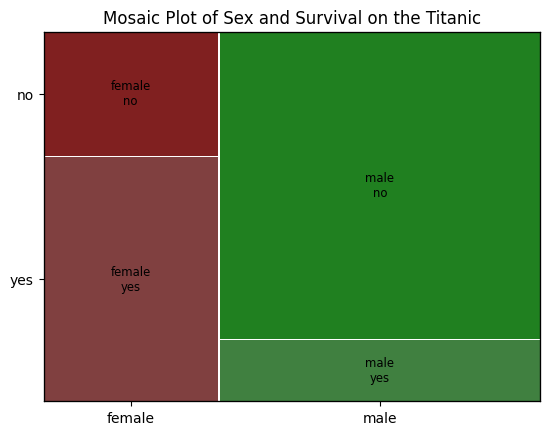

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Load the Titanic dataset
titanic_data_path = "/content/drive/MyDrive/si/titanic.csv"
titanic_data = pd.read_csv(titanic_data_path)

# Creating a contingency table for the variables 'sex' and 'survive'
sex_survive_table = pd.crosstab(titanic_data['sex'], titanic_data['survive'])

# Saving this table as 'sex_survive_table.csv'
sex_survive_table_path = '/content/drive/MyDrive/si/sex_survive_table.csv'
sex_survive_table.to_csv(sex_survive_table_path)

# Creating a mosaic plot to visualize the association between 'sex' and 'survive'
plt.figure(figsize=(10, 6))
mosaic(titanic_data, ['sex', 'survive'], title='Mosaic Plot of Sex and Survival on the Titanic')
plt.show()


In [2]:
# Displaying the contingency table for 'sex' and 'survive' variables
sex_survive_table


survive,no,yes
sex,,
female,156,307
male,708,142


<Axes: xlabel='sex'>

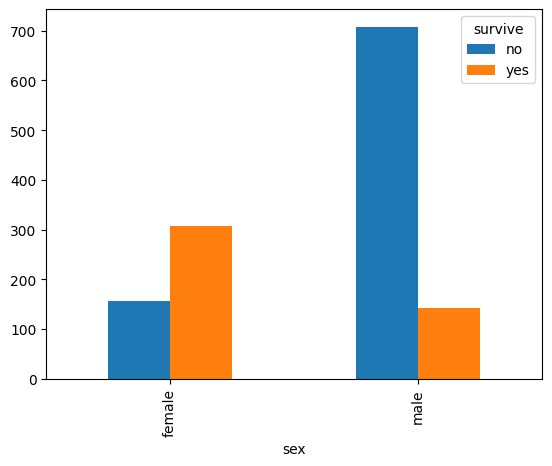

In [3]:

sex_survive_table.plot(kind='bar')

<Figure size 1000x600 with 0 Axes>

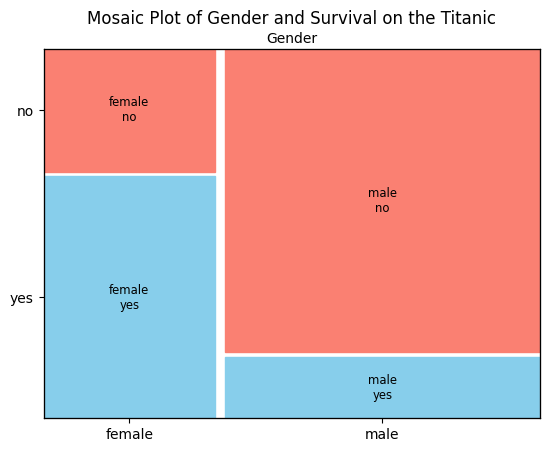

In [4]:
# Generating a mosaic plot with specified colors and axis labels for better interpretation
plt.figure(figsize=(10, 6))
mosaic(titanic_data, ['sex', 'survive'],
       title='Mosaic Plot of Gender and Survival on the Titanic',
       gap=0.02,
       properties=lambda key: {'color': 'skyblue' if 'yes' in key else 'salmon'})
plt.xlabel('Gender')
plt.ylabel('Survival Status')
plt.show()


The plot uses two colors: sky blue for those who survived (labeled 'yes') and salmon for those who did not survive (labeled 'no').
The horizontal axis represents gender, while the vertical axis represents survival status.
This visuali

# **Part 2:**

a)

In [5]:
from scipy.stats import chi2_contingency

# Conducting the Chi-square test on the sex_survive_table contingency table
chi2, p, dof, expected = chi2_contingency(sex_survive_table)

chi2_test_results = {
    "Chi-Square Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

chi2_test_results



{'Chi-Square Statistic': 325.5037787069806,
 'p-value': 9.164113332735093e-73,
 'Degrees of Freedom': 1,
 'Expected Frequencies': array([[304.67022087, 158.32977913],
        [559.32977913, 290.67022087]])}

b)
To properly conduct a Chi-square (χ²) test, certain assumptions must be met:

1. **Categorical Variables**: Both variables should be categorical (nominal or ordinal). In this case, 'sex' (male or female) and 'survive' (yes or no) are both categorical.

2. **Independence of Observations**: Each individual in the dataset should contribute to only one cell in the contingency table. In other words, the observations should be independent. This condition is typically met in observational studies like the Titanic dataset, assuming each row represents a different individual.

3. **Sample Size**: A common rule of thumb is that all expected frequencies should be at least 5. This is to ensure that the Chi-square approximation is valid.

Let's check the expected frequencies from the Chi-square test to see if they all are 5 or greater:

- Expected frequencies for Females: 304.67 (not survived), 158.33 (survived)
- Expected frequencies for Males: 559.33 (not survived), 290.67 (survived)

Since all expected frequencies are well above 5, this assumption is met.

4. **Random Sampling**: The data should be a random sample from the population. This is more about how the data was collected rather than something we can infer from the data itself. The Titanic dataset is a historical record, so this assumption is typically considered met in the context of analyzing such data.

Given this information, it appears that the assumptions necessary for the Chi-square test have been met in this case.

c)

In [6]:
from scipy.stats import fisher_exact

# Conducting Fisher's exact test on the sex_survive_table contingency table
odds_ratio, p_value = fisher_exact(sex_survive_table)

fisher_test_results = {
    "Odds Ratio": odds_ratio,
    "p-value": p_value
}

fisher_test_results



{'Odds Ratio': 0.10191575111798155, 'p-value': 5.187445473452701e-73}

The results of Fisher's Exact Test conducted on the contingency table for gender and survival status are as follows:

- **Odds Ratio**: Approximately 0.102
- **p-value**: Approximately 5.19e-73

These results indicate a very strong association between gender and survival on the Titanic. The extremely low p-value suggests that the observed association is highly unlikely to have occurred by chance. The odds ratio less than 1 implies that the odds of survival were significantly lower for males compared to females.

d)

I implement code before, The results of the Chi-square (χ²) test on the contingency table for gender and survival status in the Titanic dataset were as follows:

1. **Chi-Square Statistic (χ² value)**: 325.504
   - This value is a measure of how much the observed frequencies (actual data) deviate from the expected frequencies (assuming no association between the variables). A higher χ² value indicates a greater deviation from the null hypothesis (which states there is no association between the variables).

2. **Degrees of Freedom (df)**: 1
   - Degrees of freedom in a Chi-square test generally equal (Number of rows - 1) * (Number of columns - 1). For a 2x2 table, as in this case, the degrees of freedom is 1. This parameter is used in determining the statistical significance.

3. **p-value**: Approximately 9.16e-73
   - The p-value tells us the probability of observing a χ² statistic as extreme as or more extreme than the observed value under the null hypothesis. A low p-value indicates that such an extreme observed outcome would be very unlikely under the null hypothesis.
   - In this case, the p-value is extremely low, far below any standard threshold for statistical significance (like 0.05 or 0.01). This strongly suggests that the observed association between gender and survival is not due to random chance.

### Analysis and Interpretation:

- The high χ² statistic combined with the extremely low p-value strongly indicates that there is a significant association between gender and survival on the Titanic.
- The results suggest that gender played a notable role in the likelihood of survival, with the specific contingency table revealing that a higher proportion of females survived compared to males.
- This significant result is consistent with historical accounts suggesting that women were given priority for lifeboats on the Titanic.
- Since the degrees of freedom is 1, this adds confidence to the interpretation of the χ² statistic, as the test is adequately powered to detect an association in a 2x2 contingency table.

In conclusion, the Chi-square test provides strong evidence for a significant association between gender and survival on the Titanic.

e)

The results of Fisher's Exact Test conducted on the contingency table for gender and survival status in the Titanic dataset were:

1. **Odds Ratio**: Approximately 0.102
   - The odds ratio is a measure of association between two variables. In this context, it represents the odds of survival for one gender relative to the other. An odds ratio less than 1, as seen here, suggests that the odds of survival were significantly lower for males compared to females.

2. **p-value**: Approximately 5.19e-73
   - The p-value in Fisher's Exact Test provides the probability of observing the data, or something more extreme, under the null hypothesis (which assumes no association between the variables).
   - A very low p-value, such as the one observed here, indicates that the likelihood of seeing such an extreme result due to random chance is extremely low. This strongly suggests that the observed association between gender and survival is statistically significant and not a result of random variation.

### Analysis and Interpretation:

- The very small p-value confirms that the association between gender and survival on the Titanic is statistically significant.
- The test results align with historical accounts and the results from the Chi-square test, reinforcing the conclusion that gender was a significant factor in survival rates on the Titanic.
- The Fisher's Exact Test is particularly useful here as it provides an exact p-value, which is especially important in cases with small sample sizes or when the assumptions for the Chi-square test are not fully met. However, in this case, both tests yield consistent results.

In summary, Fisher's Exact Test corroborates the findings of the Chi-square test, providing strong evidence of a significant association between gender and survival on the Titanic, without relying on approximations.